# Métodos de solución numérica para problemas matriciales y sistemas de ecuaciones lineales.
## Noel Alejandro Contreras Acosta
### 1. Productos vectoriales y matriciales (valor: 2 puntos). Escribe el pseudocodigo de los algoritmos que realicen las siguientes operaciones vectoriales; así como los respectivos programas en python, sin usar bibliotecas como numpy ni cualquier otra (i.e. usando solo listas ) que implementen dichos algoritmos:

### (a) El producto interior (producto punto) de dos vectores en R3. En este caso, para la implementacion el usuario del programa debe insertar las entradas de los vectores.

In [62]:
import numpy as np

In [64]:
def ProductoPunto(a,b): #definimos la función 
    if len(a)!=3 or len(b)!=3: #los vectores deben tener 3 componentes pues se pide que sea en R3.
        print("Los vectores deben estar en R3, por lo que deben tener 3 entradas.")
        return None
    s=0 #se empieza le resultado en 0
    for i in range(len(a)): #se barre i desde 0 a 2
        s+=a[i]*b[i]  #se hace el producto de componente a componente y se va sumando a s
    return s #regresa el producto punto


In [68]:
vector_a=input('Introduce las componentes del vector a separadas por un espacio: ') #se le pide la usuario que introduzca las componentes de los vectores
vector_b=input('Introduce las componentes del vector b separadas por un espacio: ')

a=list(map(float,vector_a.split())) #separa lo ingresado por un espacio y esos elementos en float's y los agrega a una lista para crear al vector
b=list(map(float,vector_b.split()))

print(f'El producto punto de {a} con {b} es: ', ProductoPunto(a,b))

Introduce las componentes del vector a separadas por un espacio:  5
Introduce las componentes del vector b separadas por un espacio:  4


Los vectores deben estar en R3, por lo que deben tener 3 entradas.
El producto punto de [5.0] con [4.0] es:  None


### (b) El producto interior de dos vectores en Rn. Para la implementación, en este caso, encuentra una manera de generar dos vectores diferentes en Rn 1

In [70]:
n=int(input('Ingrese el número de componentes que tendrán los vectores: ')) #El usuario ingrea la cantidad de componentes que tendrá el vector
a=np.random.randint(0,10000,n) #se generan dos vectores de n componentes de forma aleatoria; dichas componentes tienen valores entre 0 y 10000
b=np.random.randint(0,10000,n)
def ProductoPuntoN(a,b): #generamos la función que realiza el producto punto de los vectores a y b
    resultado=0 #inicializamos el resultado en 0
    for  i in range(n): #en este ciclo for se realiza la multipicación de los vectores componente a componente y se van sumando
        resultado+=a[i]*b[i]
    return resultado #obtenemos el resultado del producto punto

print(f'El producto punto de {a} con {b} es: ', ProductoPuntoN(a,b))


Ingrese el número de componentes que tendrán los vectores:  5


El producto punto de [ 669 7567 2903 2295 4111] con [8257 8454 2658 4097 6964] es:  115243144


### (c) El producto de una matriz en A ∈ Rnxn, por un vector de Rn. Para la implementación las entradas tanto del vector como de la matriz deben leerse de un archivo de datos (que tú puedes generar).

In [72]:
def MatVec(archivo): #generamos la función que nos dará el producto de una matriz por un vector. El argumento de la función es un archivo de texto
    #el cual contiene n+1 renglones. Hasta el renglón n, cada renglón es una fila de la matriz. Los componentes de cada fila están separados por un espacio
    #mientras que el renglón n+1 del archivo es el vector.

    lineas=archivo.readlines() #se lee por lineas el archivo
    l=[] #inicializamos una lista vacia en donde se agregarán todas los renglones que se extraigan del archivo
    for i in lineas:
        l.append(list(map(float,i.split()))) #se extrae cada renglón del archivo convirtiéndolos en listas cuyos elementos se convierten en flotantes.
        #estas listas (renglones) se agregan a al lista l
    resultado=[] #defnimos otra lista vacia que contendrá el vector resultante de la operación
    for indice, j in enumerate(l): #iniciamos un ciclo for considerando enumerate para evitar posibles errores con la indexación en caso de que 
        #se tengan filas repetidas envel archivo
        suma=0 
        if indice<len(l)-1: #si el índice del elemento (fila) de la lista l en cuestión es menor que el índice del último elemento de l (el vector)
            #básicamente lo que se buscará en este if es generar el producto de punto de las filas de la matriz con el vector
            for k in range(len(j)):
                suma+=j[k]*l[len(l)-1][k] #se realiza la multiplicación del elemento k de la fila j por el elemento k del vector y el resultado se va
                #sumando hasta terminar de multiplicar todos los elementos de la fila j por los elementos del vector. Y el resultado se agrega a la lista
                #resultado, generando así el vector resultante de la operación
            resultado.append(suma) 
    return resultado #nos regresa el vector final

archivo=open('PruebaMatVec.txt') 
print('EL resultado de multiplicar tu matriz por tu vector es: ', MatVec(archivo))#se usa un archivo de prueba


EL resultado de multiplicar tu matriz por tu vector es:  [30.0, 72.0, 114.0, 0]


### (d) El producto de dos matrices A, B ∈ Rnxn. En la implementacion las entradas de ambas matrices deben leerse de un archivo de datos (que tú generes).

In [75]:
def Productonxn(archivo1): #generamos la función que nos dará el resultado de multiplicar matriz nxn con otra nxn. Las matrices están en un archivo en un 
    #formato similar al del inciso anterior, con la única diferencia de que en este caso hay salto de línea (renglón vacio) que separa las matrices
    archivo=open(archivo1) #abrimos el archivo donde están las matrices
    lineas=archivo.readlines() #o leemos por lineas
    Matriz1=[] #listas auxiliares donde se extraerán las filas de las matrices
    Matriz2=[]
    l=[] #lista auxiliar donde se extraerán todos los renglones del archivo
    for i in lineas:
        l.append(list(map(float,i.split()))) #agregamos todos los renglones del aerchivo de texto. Cada renglón convertido en lista con elementos flotantes
    for indice, j in enumerate(l): #usamos enumerate por la misma razón que en el inciso anterior
        if indice<=(len(l)-1)/2-1: #los renglones correspondientes a las filas de la matriz1 se agreggan a la lista correspondiente
            Matriz1.append(j)
        elif indice>(len(l)+1)/2-1:#los renglones correspondientes a las filas de la matriz1 se agreggan a la lista correspondiente
            Matriz2.append(j)
    resultado= [[0 for _ in range(len(Matriz1))] for _ in range(len(Matriz1))] #creamos la matriz resultado, la cual inicializamos con sus elementos 0
    for n in range(len(Matriz1)): #recorremos las filas de la matriz1
        for m in range(len(Matriz1)): #recorremos las columnas de la matriz2
            for k in range(len(Matriz1)): #recorremos las columnas de matriz1 y filas de la matriz2
                resultado[n][m]+=Matriz1[n][k]*Matriz2[k][m] #se va rellenando la matriz resultado con los elementos resultantes de multiplicar 
                #las dos matrices originales
    return Matriz1, Matriz2, resultado #obtenemos las dos matrices que se multiplicaron y la matriz resultante de dicha multiplicación

x=Productonxn('PruebaMatMat.txt') #se usa un archivo de prueba

print(f'El resultado de multiplicar la matriz {x[0]} con la matriz {x[1]} es la matriz siguiente: \n{x[2]} ') 


El resultado de multiplicar la matriz [[-12.0, -56.0, 19.0], [3.0, 4.0, 5.0], [7.0, 8.0, 9.0]] con la matriz [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]] es la matriz siguiente: 
[[-103.0, -152.0, -201.0], [54.0, 66.0, 78.0], [102.0, 126.0, 150.0]] 


### (e) Convierte tus códigos en funciones y generaliza todo en un única función que realice el producto de dos matrices A ∈ Rnm y B ∈ Rmn así como el cálculo de cualquiera de los incisos anteriores, dependiendo de la entrada que se le de a la función. En todos los casos, las entradas deben leerse de un archivo de datos.

In [78]:
def MultipicaciónGeneral(archivo1): #el archivo que se meterá como argumento de la función funcion de forma análoga al descrito para el inciso anterior.
    #la separación entre los vectores, matriz y vector o matrices es a través de un renglón vacío. Según sea el caso del contenido del archivo, lo que se
    #hace es lo descrito para los incisos anteriores. Solamente se modificó un poco el caso apra matriz y vector pues en el inciso c) el archivo que se 
    #metía no tenpia como división un renglón vacío, y en este caso sí será así. 
    archivo=open(archivo1)
    lineas=archivo.readlines()

    Matriz1=[]
    Matriz2=[]
    l=[]
    for i in lineas:
        l.append(list(map(float,i.split())))
    separador = l.index([])
    for indice, j in enumerate(l):
        if indice<=(separador-1):
            Matriz1.append(j)
        elif indice>(separador):
            Matriz2.append(j)
    
    if len(Matriz1)==1 and len(Matriz2)==1: #caso para cuando el archivo contiene dos vectores
        resultado=0
        n=len(Matriz1[0])
        for  i in range(0,n):
            resultado+=Matriz1[0][i]*Matriz2[0][i]
        return f'El resultado del producto punto de los vectores {Matriz1} y {Matriz2} es: {resultado}.'




    if len(Matriz1)>1 and len(Matriz2)==1: #caso para cuando el archivo contiene una matriz y un vector
        resultado=[0 for _ in range(len(Matriz1))]
        for n in range(len(Matriz1)):
            for m in range(len(Matriz1)):
                resultado[n]+=Matriz1[n][m]*Matriz2[0][m]
        return f'El resultado de multiplicar la matriz {Matriz1} con el vector {Matriz2} es: {resultado}'
            
        



    elif len(Matriz1)>1 and len(Matriz2)>1: #caso para cuando el archivo contiene dos matrices
        resultado= [[0 for _ in range(len(Matriz1))] for _ in range(len(Matriz1))]
        for n in range(len(Matriz1)):
            for m in range(len(Matriz1)):
                for k in range(len(Matriz1)):
                    resultado[n][m]+=Matriz1[n][k]*Matriz2[k][m]
        return f'El resultado de multiplicar la matriz {Matriz1} con la matriz {Matriz2} es: {resultado}'
        






print(MultipicaciónGeneral('PruebaVecVec.txt')) #Archivos de prueba
print(MultipicaciónGeneral('PruebaMatMat.txt'))
print(MultipicaciónGeneral('PruebaMatVec.txt'))








        
    
    
    
    
    
    

El resultado del producto punto de los vectores [[56.0, -345.0, -67.0]] y [[88.0, 0.0, 11123.0]] es: -740313.0.
El resultado de multiplicar la matriz [[-12.0, -56.0, 19.0], [3.0, 4.0, 5.0], [7.0, 8.0, 9.0]] con la matriz [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]] es: [[-103.0, -152.0, -201.0], [54.0, 66.0, 78.0], [102.0, 126.0, 150.0]]
El resultado de multiplicar la matriz [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]] con el vector [[3.0, 6.0, 5.0]] es: [30.0, 72.0, 114.0]


### 3. Descomposición LU (valor: 3 puntos).
### (a) A partir del programa para la Eliminación Gaussiana que hicimos en clase, escribe una programa que calcule la descomposición LU de una matriz. De hecho, el cálculo es el mismo que para la eliminación gaussiana, excepto que en cada paso del cálculo debes extraer los elementos apropiados de la matriz y ensamblarlos para formar la matriz diagonal inferior 
$L$ (i.e; $L = L_0^{−1}L_1^{-1}L_2^{-1}L_3^{-1}· · · ) $


In [81]:
import scipy as sp
import matplotlib.pyplot as plt

def descomposicion_lu(matriz):
    """
    Realiza la descomposición LU de una matriz cuadrada utilizando eliminación gaussiana.
    """
    n = len(matriz)
    superior = matriz.copy()  # Copia de la matriz original para trabajar en U
    inferior = np.identity(n)  # Matriz identidad inicial para L

    for fila_pivote in range(n):# Iteramos sobre las filas debajo del pivote actual
        for fila_objetivo in range(fila_pivote + 1, n): # Creamos una matriz identidad temporal para construir L en este paso
            l_elemental = np.identity(n)

            multiplicador = superior[fila_objetivo, fila_pivote] # Calculamos el multiplicador para el pivote

            superior[fila_objetivo, :] -= multiplicador * superior[fila_pivote, :] / superior[fila_pivote, fila_pivote]# Realizamos la eliminación gaussiana para hacer cero el elemento debajo del pivote

            l_elemental[fila_objetivo, fila_pivote] = multiplicador / superior[fila_pivote, fila_pivote] # Actualizamos el valor correspondiente en la matriz elemental de L

            inferior = np.dot(inferior, l_elemental) # Acumulamos la transformación en la matriz L

    return inferior, superior

matriz_original = np.array([[ 2,  1,  4,  1 ],  # Creamos la matriz que nos dieron en clase
                            [ 3,  4, -1, -1 ],
                            [ 1, -4,  1,  5 ],
                            [ 2, -2,  1,  3 ]], dtype=float)

# Creamos copias de la matriz y el vector para comparaciones posteriores
matriz_copia = matriz_original.copy()
vector_original = np.array([-4, 3, 9, 7], dtype=float)
vector_copia = vector_original.copy()

# Obtenemos el tamaño de la matriz
tamaño = len(matriz_original)

# Realizamos la descomposición LU utilizando la función definida anteriormente
L = descomposicion_lu(matriz_original)[0]  # Parte L
U = descomposicion_lu(matriz_original)[1]  # Parte U

print(f'\t\t\t---Descomposición L, U de una matriz A---\n'
      f'Matriz original A:\n{matriz_copia}\n'
      f'Parte L (matriz inferior):\n{L}\n'
      f'Parte U (matriz superior):\n{U}')

			---Descomposición L, U de una matriz A---
Matriz original A:
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
Parte L (matriz inferior):
[[ 1.          0.          0.          0.        ]
 [ 1.5         1.          0.          0.        ]
 [ 0.5        -1.8         1.          0.        ]
 [ 1.         -1.2         0.83823529  1.        ]]
Parte U (matriz superior):
[[  2.    1.    4.    1. ]
 [  0.    2.5  -7.   -2.5]
 [  0.    0.  -13.6   0. ]
 [  0.    0.    0.   -1. ]]


### (b) Prueba tu programa calculando la descomposición LU de la matriz del sistema que abordamos en clase:

$$ 
\begin{bmatrix}
2 & 1 & 4 & 1 \\
3 & 4 &-1 & -1\\
1 &-4 & 1 & 5 \\
2 &-2 & 1 & 3
\end{bmatrix}
\begin{bmatrix}
t \\
x \\
y \\
z \\ 
\end{bmatrix} =
\begin{bmatrix}
-4\\
3 \\
9 \\
7 
\end{bmatrix} $$

In [84]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)


v = np.array([ -4, 3, 9, 7 ],float)  # Vector del sistema a resolver

### (c) Multiplica las matrices L y U que obtengas y verifica que se recupere la matriz original.

In [87]:
print(f'Producto de L y U:\n{np.dot(L,U)}')

Producto de L y U:
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]


### (d) Convierte tu programa en una función y usala para crear un programa completo para resolver el sistema (ec. 1), realizando una doble sustitución inversa (backsustitution).



In [90]:
# Inicializamos el vector auxiliar para la sustitución hacia adelante
x = np.empty(tamaño)

# Sustitución hacia adelante para resolver Lx = b
for fila in range(tamaño):
    suma = sum(L[fila][columna] * x[columna] for columna in range(fila))
    x[fila] = (vector_original[fila] - suma) / L[fila][fila]

# Inicializamos el vector solución para la sustitución hacia atrás
y = np.empty(tamaño)

# Sustitución hacia atrás para resolver Uy = x
for fila in reversed(range(tamaño)):
    suma = sum(U[fila][columna] * y[columna] for columna in range(fila + 1, tamaño))
    y[fila] = (x[fila] - suma) / U[fila][fila]

print(f'Solución del sistema:\nMatriz A:\n{matriz_copia}\n'
      f'--------------------------\nVector b:\n{vector_copia}\n'
      f'Es:\n{y}')

Solución del sistema:
Matriz A:
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
--------------------------
Vector b:
[-4.  3.  9.  7.]
Es:
[ 2. -1. -2.  1.]


### (e) Resuelve el mismo sistema usando la funcion ́solve del paquete numpy y verifica que obtengas la misma respuesta, para cualquier otro sistema que propongas.

In [93]:
matriz = np.array([[ 2,  1,  4,  1 ],
                   [ 3,  4, -1, -1 ],
                   [ 1, -4,  1,  5 ],
                   [ 2, -2,  1,  3 ]], dtype=float)

vector = np.array([-4, 3, 9, 7], dtype=float)

# Utilizamos la función solve de NumPy para resolver el sistema de ecuaciones Ax = b
solucion = np.linalg.solve(matriz, vector)

print(f'Sistema de ecuaciones:\nMatriz A:\n{matriz}\n'
      f'Vector b:\n{vector}\n'
      f'Solución:\n{solucion}')

Sistema de ecuaciones:
Matriz A:
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
Vector b:
[-4.  3.  9.  7.]
Solución:
[ 2. -1. -2.  1.]


### 4. Pozo cuántico asimétrico (valor: 3 puntos).
### La mecánica cuántica se puede formular como un problema matricial y resolverse en una computadora usando metodos de álgebra lineal. Supongamos, por ejemplo, que tenemos una partícula de masa M en un pozo cuantico unidimensional de ancho L, pero no un pozo cuadrado como los ejemplos que probablemente hayas visto antes. Supongamos en cambio que el potencial V(x) varía de alguna manera dentro del pozo:
### No es posible resolver analíticamente este problema de forma general, pero podemos resolverlo en la computadora.
### En un estado puro de energía E, la parte espacial de la función de onda obedece a la ecuación de Schrodinger independiente del tiempo Hψ(x) = Eψ(x), donde el operador hamiltoniano H está dado por:
$$
\hat{H} = -\frac{\hbar^2}{2M} \frac{d^2}{dx^2} + V(x)
$$
### Para simplificar, supongamos que las paredes del pozo son infinitamente altas, de modo que la función de onda es cero fuera del pozo, lo que significa que debe ir a cero en x = 0 y x = L. En ese caso, la función de onda se puede expresar como una serie sinusoidal de Fourier de la siguiente forma:
$$
\psi(x) = \sum_{n=1}^{\infty} \psi_n \sin\left( \frac{n\pi x}{L} \right)
$$
### donde ψ1, ψ2, . . . son los coeficientes de Fourier.
### (a) Observando que, para m, n enteros positivos
$$
\int_0^L \sin\left( \frac{m\pi x}{L} \right) \sin\left( \frac{n\pi x}{L} \right) dx = 
\begin{cases}
\frac{L}{2}, & \text{si } m = n, \\
0, & \text{de lo contrario}.
\end{cases}
$$
### demuestra que la ecuacion de Schrodinger  ̈Hψ = Eψ implica que:
$$
\sum_{n=1}^{\infty} \psi_n \int_0^L \sin\left( \frac{m\pi x}{L} \right) \hat{H} \sin\left( \frac{n\pi x}{L} \right) dx = \frac{1}{2} L E \psi_m
$$
### Así, definiendo una matriz H con elementos:
$$
H_{mn} = \frac{2}{L} \int_0^L \sin\left( \frac{m\pi x}{L} \right)
\hat{H} \sin\left( \frac{n\pi x}{L} \right) dx \\
$$
$$
= \frac{2}{L} \int_0^L \sin\left( \frac{m\pi x}{L} \right)
\left( -\frac{\hbar^2}{2M} \frac{d^2}{dx^2} + V(x) \right)
\sin\left( \frac{n\pi x}{L} \right) dx
$$
### demuestra que la ecuacion de Schrodinger se puede escribir en forma matricial como Hψ = Eψ, donde ψ es el vector (ψ1, ψ2, . . .). Por lo tanto, ψ es un vector propio de la matriz hamiltoniana H con valor propio E. Si podemos calcular los valores propios de esta matriz, entonces conoceremos las energías permitidas de la partícula en el pozo.

### (b) Para el caso V(x) = ax/L, evalua la integral en Hmn analíticamente y encuentra una expresión general para el elemento de la matriz Hmn. Demuestra que la matriz es real y simétrica. Probablemente te resulte útil saber que:
$$
\int_0^L x \sin\left( \frac{m\pi x}{L} \right) \sin\left( \frac{n\pi x}{L} \right) dx =
\begin{cases}
0, & \text{si } m \ne n \text{ y ambos son pares o impares}, \\
-\dfrac{4L^2}{\pi^2} \cdot \dfrac{mn}{(m^2 - n^2)^2}, & \text{si } m \ne n \text{ y uno es par y el otro impar}, \\
\dfrac{L^2}{4}, & \text{si } m = n.
\end{cases}
$$
### Escribe un programa para evaluar tu expresión para  Hmn con m y n arbitrarios; cuando la partícula en el pozo es un electron, el pozo tiene un ancho 5  A y a = 10 eV. (La masa y la carga de un electron son 9.1094 × 10−31 kg y 1.6022 × 10−19 C respectivamente.)

#### La expresión para Hmn sustituyendo V(x)=ax/L queda como:
$$
H_{mn}=\frac{2}{L}\int_0^Lsen(\frac{m\pi x}{L})[-\frac{\hbar^2}{2M}\frac{d^2}{dx^2}+ \frac{ax}{L}]sen(\frac{n\pi x}{L}) dx
$$
#### Desarrollando el integrando tendremos:
$$
H_{mn}=\frac{2}{L}\int_0^Lsen(\frac{m\pi x}{L})[\frac{\hbar^2n^2\pi ^2}{2ML^2}sen(\frac{n\pi x}{L})+ \frac{ax}{L}sen(\frac{n\pi x}{L})] dx
$$
#### Seprando en dos integrales tendremos:
$$
H_{mn}=\frac{2}{L}\left(\int_0^L\frac{\hbar^2n^2\pi ^2}{2ML^2}sen(\frac{m\pi x}{L})sen(\frac{n\pi x}{L})dx + \int_0^L \frac{ax}{L}sen(\frac{m\pi x}{L}) sen(\frac{n\pi x}{L})dx\right)
$$
$$
H_{mn}=\frac{2}{L}\left(\frac{\hbar^2n^2\pi ^2}{2ML^2}\int_0^Lsen(\frac{m\pi x}{L})sen(\frac{n\pi x}{L})dx + \frac{a}{L}\int_0^Lxsen(\frac{m\pi x}{L}) sen(\frac{n\pi x}{L})dx\right)
$$
#### Y recordando las propiedades señaladas del inciso anterior y de este, Hmn queda así:
$$
H_{mn}=\frac{2}{L}\left(\frac{\hbar^2n^2\pi ^2}{2ML^2}\left( \begin{cases}
\frac{L}{2}, & \text{si } m = n, \\
0, & \text{de lo contrario}.
\end{cases}\right)    +     \frac{a}{L}\left(\begin{cases}
0, & \text{si } m \ne n \text{ y ambos son pares o impares}, \\
-\dfrac{2L^2}{\pi^2} \cdot \dfrac{mn}{(m^2 - n^2)^2}, & \text{si } m \ne n \text{ y uno es par y el otro impar}, \\
\dfrac{L^2}{4}, & \text{si } m = n.
\end{cases}\right)\right)
$$
#### Si consideramos el caso para m=n, tendremos lo siguiente:
$$
H_{mn}=\frac{2}{L}\left(\frac{\hbar^2n^2\pi ^2}{2ML^2} \frac{L}{2}+ \frac{aL^2}{4L}\right)
$$
$$
H_{mn}=\frac{2}{L}\left(\frac{\hbar^2n^2\pi ^2}{4ML}+ \frac{aL}{4}\right)
$$
$$
H_{mn}=\frac{\hbar^2n^2\pi ^2}{2ML^2}+ \frac{a}{2}
$$
#### Mientras que si consideramos que m y n son distintos con ambos pares o impares, tendremos:
$$
H_{mn}=0
$$
#### Y si consideramos el caso donde son diferentes pero uno es par y el otor impar:
$$
H_{mn}\frac{2}{L}\frac{a}{L}\left(-\dfrac{4L^2}{\pi^2}\dfrac{mn}{(m^2 - n^2)^2}\right)
$$


#### Notemos que Hmn es un valor real sin importar el caso que se tenga para m y n, y dado que Hmn es cualquier componente de la matriz H, podemos concluir que la matriz es real. 
#### Por otro lado, 

In [98]:
#Para el caso que estamos trabajndi
def Hmn(m,n): #definimos la función que nos calcula Hmn en función de m y n 
    if type(m)!= int or type(n)!=int or m<0 or n<0: #este if es para el caso en que m o n no sean enteros positivos. Le señala al usuario lo anterior
        return 'm y n deben ser números enteros positivos.'
    

    a=1.6022e-18 #J
    M= 9.1094e-31 #kg
    L=5e-10 #m
    hbarra=1.054571817e-34 #Js
    
    if m==n: #caso para cuando m es igual que n
        return hbarra**2*n**2*np.pi**2/(2*M*L**2) + (a/2)
    elif m!=n and n%2==0 and m%2==0: #caso para cuando m y n son distintos y ambos son pares
        return 0
    elif m!=n and n%2==1 and m%2==1:  #caso para cuando m y n son distintos y ambos son impares
        return 0
    else: #este es el caso para cuando m y n son distintos y uno es par y el otro impar. 
        return (-8*a/np.pi**2)*(m*n/(m**2-n**2)**2)


In [100]:
m=int(input('Ingresa el valor de m: ')) #Le pide al ussuario que ingrese os valores de m y n y los convierte en enteros
n=int(input('Ingresa el valor de n: '))

print('El valor de Hmn es: ', Hmn(m,n)) 

Ingresa el valor de m:  2
Ingresa el valor de n:  4


El valor de Hmn es:  0


### (c) En teoría, la matriz H es infinitamente grande, por lo que no podemos calcular todos sus valores propios. Pero podemos obtener una solución bastante precisa de los primeros recortando la matriz. Modifica el programa que escribiste para el inciso anterior para crear una matriz de 10 × 10 de los elementos de H (i.e. m, n = 10). Calcula los valores propios de esta matriz usando la función apropiada de la biblioteca numpy.linalg y entonces imprime (en unidades de electron-volts) los primeros diez niveles de energía del pozo cuántico, dentro de esta aproximación. Deberías encontrar, por ejemplo, que la energía del estado fundamental del sistema es de alrededor de 5, 84 eV. (Hint: ten en cuenta que los indices matriciales en Python comienzan en cero, mientras que los  ́ındices en expresiones algebraicas estandar, como las anteriores, comienzan en uno. Ten en cuenta esto en tu programa).

In [102]:
def Hmn(m,n): #definimos la función que nos calcula Hmn en función de m y n 
    if type(m)!= int or type(n)!=int or m<0 or n<0: #este if es para el caso en que m o n no sean enteros positivos
        return 'm y n deben ser números enteros positivos menores o iguales a 10.'

    a = 1.6022e-18 #J
    M= 9.1094e-31 #kg
    L=5e-10 #m
    hbarra=1.054571817e-34 #Js
    H=np.zeros((m,n)) #Generamos la matriz llena de 0 y a continuación se empieza a rellenar según sea el caso
    for i in range(1,m+1): #recorremos las filas
        for j in range(1,n+1): #recorremos las columnas
            if i==j: #caso para cuando i es igual que j
                H[i-1,j-1]=hbarra**2*j**2*np.pi**2/(2*M*L**2) + (a/2)
            
            elif i!=j and ((i % 2 == 0 and j % 2 != 0) or (i % 2 != 0 and j % 2 == 0)): #caso para cuando i y j son distintos y uno es par y el otro impar. 
                H[i-1,j-1] =(-8*a/np.pi**2)*(i*j/(i**2-j**2)**2)
            #en este caso omitimos poner los otros casos porque  para esos Hmn=0, y como la matriz generada es de puro ceros, entonces ya 
            #no hay nada que sustituir ahí
    return H

H10=Hmn(10,10) #obtenemos la matriz de 10x10
eigenvalores=np.linalg.eigvals(H10) #obtenemos los eigenvalores de la matriz
energias=eigenvalores/1.6022e-19 #convertimos las energías a eV
energias.sort() #acomodamos las energías
print('Las energías de los 10 primeros estados son:\n', energias)
print('El estado de energía fundamental es: ', energias.min(), 'eV')


Las energías de los 10 primeros estados son:
 [  5.83634278  11.18099573  18.66267191  29.14380498  42.65445998
  59.18437179  78.72815384 101.28390796 126.84939113 155.55286833]
El estado de energía fundamental es:  5.836342777696578 eV


### (d) Modifica tu programa para usar una matriz de 100 × 100 y calcula nuevamente los primeros diez valores propios de energía. Comparando con los valores que calculaste en el inciso (c), ¿que concluyes sobre la precisión del cálculo?


In [105]:
#Simplemente evaluammos la función generada anteriormente en m=100 y n=100. Pero por el caso de que se ejecute esta celda antes que la del inciso c, 
#porcederé a copiar la función anterior aquí
def Hmn(m,n): #definimos la función que nos calcula Hmn en función de m y n 
    if type(m)!= int or type(n)!=int or m<0 or n<0: #este if es para el caso en que m o n no sean enteros positivos
        return 'm y n deben ser números enteros positivos menores o iguales a 10.'

    a = 1.6022e-18 #J
    M= 9.1094e-31 #kg
    L=5e-10 #m
    hbarra=1.054571817e-34 #Js
    H=np.zeros((m,n)) #Generamos la matriz llena de 0 y a continuación se empieza a rellenar según sea el caso
    for i in range(1,m+1): #recorremos las filas
        for j in range(1,n+1): #recorremos las columnas
            if i==j: #caso para cuando i es igual que j
                H[i-1,j-1]=hbarra**2*j**2*np.pi**2/(2*M*L**2) + (a/2)
            
            elif i!=j and ((i % 2 == 0 and j % 2 != 0) or (i % 2 != 0 and j % 2 == 0)): #caso para cuando i y j son distintos y uno es par y el otro impar. 
                H[i-1,j-1] =(-8*a/np.pi**2)*(i*j/(i**2-j**2)**2)
            #en este caso omitimos poner los otros casos porque  para esos Hmn=0, y como la matriz generada es de puro ceros, entonces ya 
            #no hay nada que sustituir ahí
    return H
H100=Hmn(100,100)
eigenvalores=np.linalg.eigvals(H100) #obtenemos los eigenvalores de la matriz
energias=eigenvalores/1.6022e-19 #convertimos las energías a eV
energias.sort() #acomodamos las energías

print('Las energías de los 100 primeros estados son:\n', energias[:10])
print('El estado de energía fundamental es: ', energias.min(), 'eV')

#Al comparar las energías con las obtenidas en el inciso c, notamos que las energías en este inciso son menores, lo cual nos indica que la precisión
#es mejor, ya que sabemos que los valores aproximados para los estados de energía siempre deben ir a la baja deben ir haciéndose más pequeños para 
#acercarnos al valor real.


Las energías de los 100 primeros estados son:
 [  5.83634238  11.1809944   18.66267004  29.14379618  42.65445086
  59.18431921  78.72810201 101.28327702 126.84855878 155.42324375]
El estado de energía fundamental es:  5.836342377005791 eV


### (e) Ahora modifica tu programa, una vez más, para calcular la función de onda ψ(x) para el estado fundamental y los dos primeros estados excitados del pozo. Utiliza tus resultados para hacer una gráfica con tres curvas que muestren la densidad de probabilidad |ψ(x)|^2 en función de x para cada uno de estos tres estados. Presta mucha atencion a la normalización de la función de onda: debe satisfacer la condición:
$$ \int_0^L|ψ(x)|^2 dx = 1
$$
### ¿Esto es cierto para tu funcion de onda?

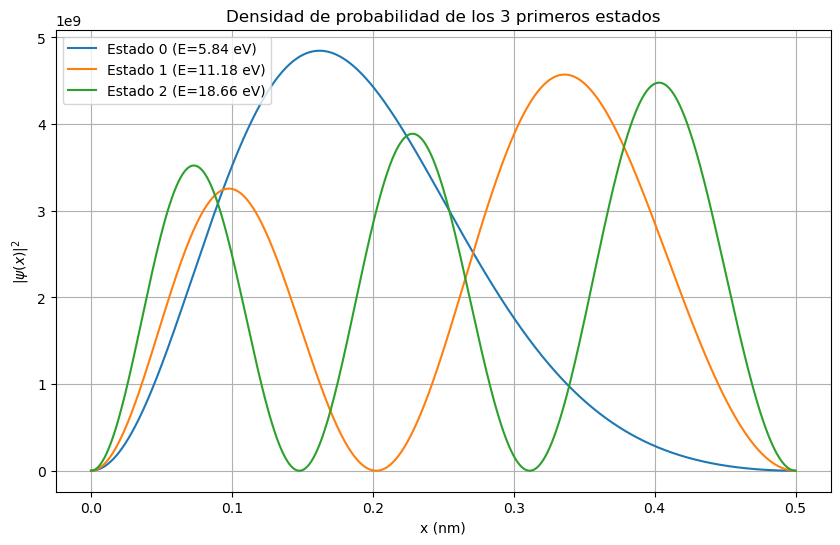

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Usamos la matriz ya definida H100 y los eigenvalores ya ordenados
eigenvalores, eigenvectores = np.linalg.eigh(H100)  # eigenvectores[:,k] es el k-ésimo vector propio
energias = eigenvalores / 1.6022e-19
energias.sort()

L = 5e-10
x = np.linspace(0, L, 1000)  # Puntos del espacio

# Funciones de onda para los 3 primeros estados
psi = []
for k in range(3):
    psi_k = np.zeros_like(x)
    for n in range(1, 101):
        coef = eigenvectores[n-1, k]
        psi_k += coef * np.sin(n * np.pi * x / L)
    # Normalizamos
    norm = np.sqrt(np.trapz(np.abs(psi_k)**2, x))
    psi.append(psi_k / norm)

# Graficamos la densidad de probabilidad
plt.figure(figsize=(10, 6))
for k in range(3):
    plt.plot(x * 1e9, np.abs(psi[k])**2, label=f'Estado {k} (E={energias[k]:.2f} eV)')
plt.xlabel('x (nm)')
plt.ylabel(r'$|\psi(x)|^2$')
plt.title('Densidad de probabilidad de los 3 primeros estados')
plt.legend()
plt.grid(True)
plt.show()